# Anomaly Detection using PyOD
This note is based on the following pages:
- https://pyod.readthedocs.io/en/latest/index.html
- https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1
- https://github.com/yzhao062/pyod/blob/master/notebooks/Compare%20All%20Models.ipynb

For general ideas of anomaly detection:
- https://en.wikipedia.org/wiki/Anomaly_detection

__OD__ in PyOD stands for __Outlier Detection__.
There are many anomaly detection (outlier detection) models. just like there are many in binary classification models.
<br>
<br>
<br>
Let's write a code that tests multiple models (based on https://github.com/yzhao062/pyod/blob/master/notebooks/Compare%20All%20Models.ipynb).

## Example of Comparing All Implemented Outlier Detection Models
[__PyOD__](https://pyod.readthedocs.io/en/latest/index.html) is a comprehensive Python toolkit to identify outlying objects in multivariate data with both unsupervised and supervised approaches. The model covered in this example includes:

1. Linear Models for Outlier Detection:

&emsp;&emsp;A. __PCA: Principal Component Analysis__ use the sum of weighted projected distances to the eigenvector hyperplane as the outlier outlier scores) <br>
&emsp;&emsp;B. __MCD: Minimum Covariance Determinant__ (use the mahalanobis distances as the outlier scores) <br>
&emsp;&emsp;C. __OCSVM: One-Class Support Vector Machines__

2. Proximity-Based Outlier Detection Models:

&emsp;&emsp;A. __LOF: Local Outlier Factor__ <br>
&emsp;&emsp;B. __CBLOF: Clustering-Based Local Outlier Factor__ <br>
&emsp;&emsp;C. __kNN: k Nearest Neighbors__ (use the distance to the kth nearest neighbor as the outlier score) <br>
&emsp;&emsp;D. __Median kNN__ Outlier Detection (use the median distance to k nearest neighbors as the outlier score) <br> 
&emsp;&emsp;E. __HBOS: Histogram-based Outlier Score__

3. Probabilistic Models for Outlier Detection:

&emsp;&emsp;A. __ABOD: Angle-Based Outlier Detection__

4. Outlier Ensembles and Combination Frameworks

&emsp;&emsp;A. __Isolation Forest__ <br>
&emsp;&emsp;B. __Feature Bagging__ <br>
&emsp;&emsp;C. __LSCP__ <br>

Corresponding file could be found at /examples/compare_all_models.py

In [1]:
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
from pyod.models.inne import INNE
from pyod.models.gmm import GMM
from pyod.models.kde import KDE
from pyod.models.lmdd import LMDD

In [2]:
# Define the number of inliers and outliers
n_samples = 400
outliers_fraction = 0.05
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
# xx & yy are just to make the contour plot later.
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))

n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

# initialize a set of detectors for LSCP
detector_list = [LOF(n_neighbors=5), LOF(n_neighbors=10), LOF(n_neighbors=15),
                 LOF(n_neighbors=20), LOF(n_neighbors=25), LOF(n_neighbors=30),
                 LOF(n_neighbors=35), LOF(n_neighbors=40), LOF(n_neighbors=45),
                 LOF(n_neighbors=50)]

In [3]:
# Show the statics of the data
print('Number of inliers: %i' % n_inliers)
print('Number of outliers: %i' % n_outliers)
print('Ground truth shape is {shape}. Outlier are 1 and inliers are 0.\n'.format(shape=ground_truth.shape))
print(ground_truth)

Number of inliers: 380
Number of outliers: 20
Ground truth shape is (400,). Outlier are 1 and inliers are 0.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [4]:
random_state = np.random.RandomState(42)
# Define 16 outlier detection tools to be compared
classifiers = {
    'Angle-based Outlier Detector (ABOD)':
        ABOD(contamination=outliers_fraction),
    'Cluster-based Local Outlier Factor (CBLOF)':
        CBLOF(contamination=outliers_fraction,
              check_estimator=False, random_state=random_state),
    'Feature Bagging':
        FeatureBagging(LOF(n_neighbors=35),
                       contamination=outliers_fraction,
                       random_state=random_state),
    'Histogram-base Outlier Detection (HBOS)': HBOS(
        contamination=outliers_fraction),
    'Isolation Forest': IForest(contamination=outliers_fraction,
                                random_state=random_state),
    'K Nearest Neighbors (KNN)': KNN(
        contamination=outliers_fraction),
    'Average KNN': KNN(method='mean',
                       contamination=outliers_fraction),
    'Local Outlier Factor (LOF)':
        LOF(n_neighbors=35, contamination=outliers_fraction),
    'Minimum Covariance Determinant (MCD)': MCD(
        contamination=outliers_fraction, random_state=random_state),
    'One-class SVM (OCSVM)': OCSVM(contamination=outliers_fraction),
    'Principal Component Analysis (PCA)': PCA(
        contamination=outliers_fraction, random_state=random_state),
    'Locally Selective Combination (LSCP)': LSCP(
        detector_list, contamination=outliers_fraction,
        random_state=random_state),
    'INNE': INNE(contamination=outliers_fraction),
    'GMM': GMM(contamination=outliers_fraction),
    'KDE': KDE(contamination=outliers_fraction),
    'LMDD': LMDD(contamination=outliers_fraction),
}

In [5]:
# Show all detectors
for i, clf in enumerate(classifiers.keys()):
    print('Model', i + 1, clf)

Model 1 Angle-based Outlier Detector (ABOD)
Model 2 Cluster-based Local Outlier Factor (CBLOF)
Model 3 Feature Bagging
Model 4 Histogram-base Outlier Detection (HBOS)
Model 5 Isolation Forest
Model 6 K Nearest Neighbors (KNN)
Model 7 Average KNN
Model 8 Local Outlier Factor (LOF)
Model 9 Minimum Covariance Determinant (MCD)
Model 10 One-class SVM (OCSVM)
Model 11 Principal Component Analysis (PCA)
Model 12 Locally Selective Combination (LSCP)
Model 13 INNE
Model 14 GMM
Model 15 KDE
Model 16 LMDD


1 fitting Angle-based Outlier Detector (ABOD)
2 fitting Cluster-based Local Outlier Factor (CBLOF)
3 fitting Feature Bagging
4 fitting Histogram-base Outlier Detection (HBOS)
5 fitting Isolation Forest
6 fitting K Nearest Neighbors (KNN)
7 fitting Average KNN
8 fitting Local Outlier Factor (LOF)
9 fitting Minimum Covariance Determinant (MCD)
10 fitting One-class SVM (OCSVM)
11 fitting Principal Component Analysis (PCA)
12 fitting Locally Selective Combination (LSCP)
13 fitting INNE
14 fitting GMM
15 fitting KDE
16 fitting LMDD


C:\Users\super\anaconda3\envs\R_Ready\lib\site-packages\ipykernel_launcher.py:38: UserWarning: No contour levels were found within the data range.


something went wrong with the contour


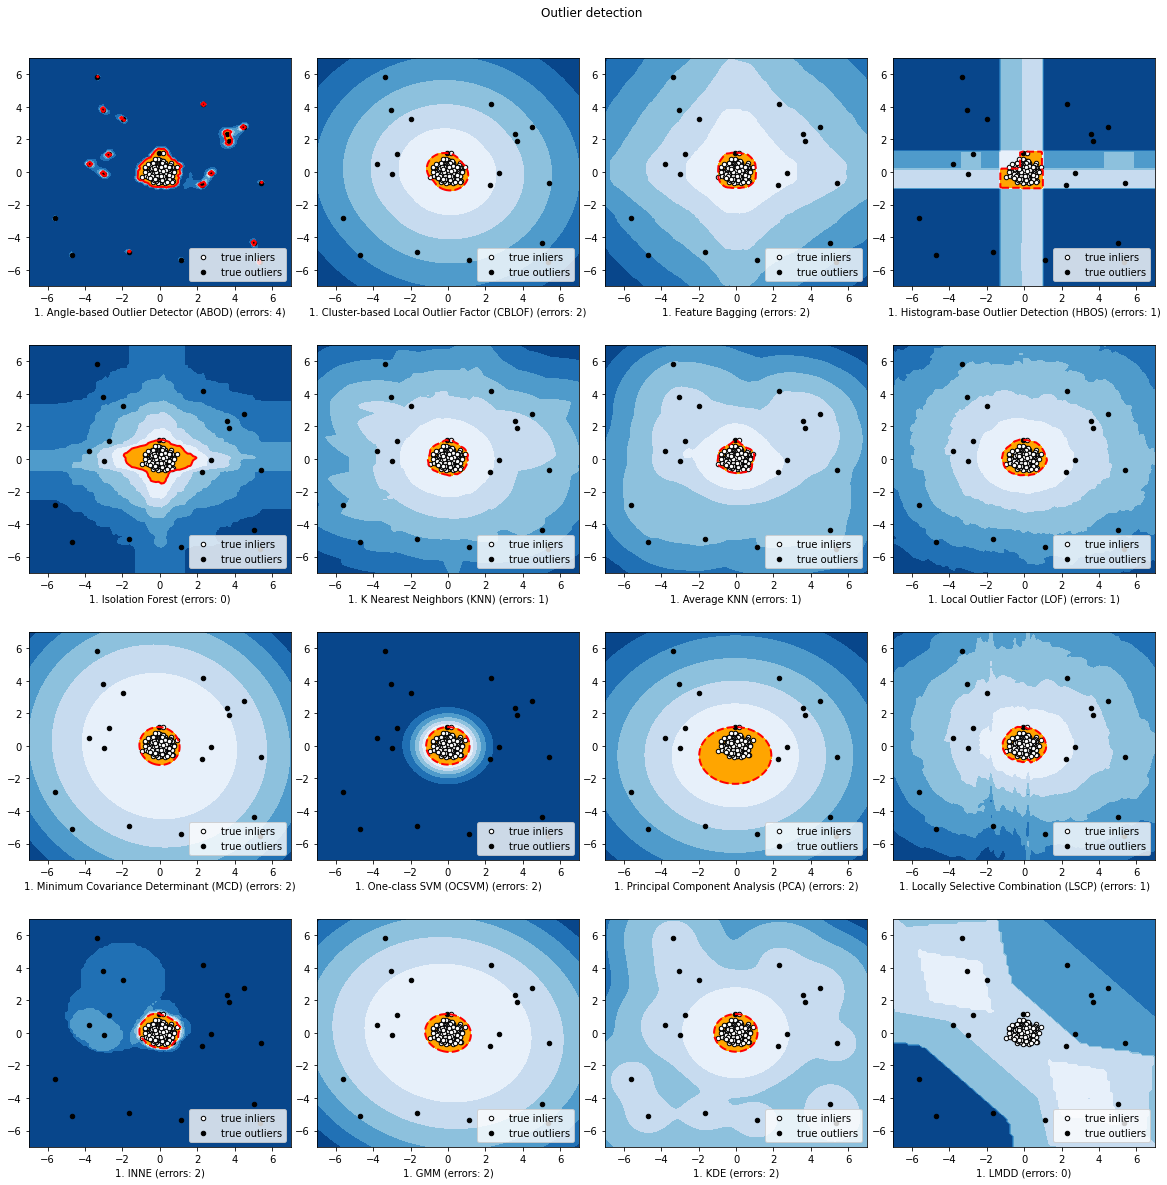

In [6]:
# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    # Inliers
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]
    
    # Composit model
    y_pred_composit = np.zeros(shape=ground_truth.shape, dtype=int)
    
    # Fit the model
    plt.figure(figsize=(17, 18))
    for j, (clf_name, clf) in enumerate(classifiers.items()):
        print(j + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        clf.fit(X)
        scores_pred = clf.decision_function(X) * -1        
        y_pred = clf.predict(X)
        
        # Composit model
        y_pred_composit = y_pred_composit + y_pred
        
        threshold = percentile(scores_pred, 100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(4, 4, j + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
        try:
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
        except:
            print("something went wrong with the contour")
        
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [
                # a.collections[0],
                b, c],
            [
                # 'learned decision function',
                'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")
plt.show()

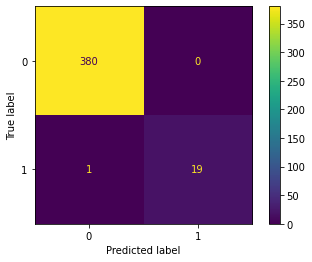

In [7]:
# Evaluate the composit model
y_pred = (y_pred_composit/len(classifiers)).round(decimals=0)

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(ground_truth, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(ground_truth, y_pred)
Precision = metrics.precision_score(ground_truth, y_pred)
Sensitivity_recall = metrics.recall_score(ground_truth, y_pred)
Specificity = metrics.recall_score(ground_truth, y_pred, pos_label=0)

In [8]:
print('Accuracy:    ', round(Accuracy, 3),           ' (True Po + True Ne)/Total Predictions, How often is the model correct?')
print('Precision:   ', round(Precision, 3),          ' True Po/(True Po + False Po), Of the positives predicted, what percentage is truly positive?')
print('Sensitivity: ', round(Sensitivity_recall, 3), ' True Po/(True Po + False Ne), Of all the positive cases, what percentage are predicted positive?')
print('Specificity: ', round(Specificity, 3),        ' True Ne/(True Ne + False Po), How well the model is at prediciting negative results?')

Accuracy:     0.998  (True Po + True Ne)/Total Predictions, How often is the model correct?
Precision:    1.0  True Po/(True Po + False Po), Of the positives predicted, what percentage is truly positive?
Sensitivity:  0.95  True Po/(True Po + False Ne), Of all the positive cases, what percentage are predicted positive?
Specificity:  1.0  True Ne/(True Ne + False Po), How well the model is at prediciting negative results?


# Hyperparameter Tuning with Multiple Models

The above composit model used mostly default hyperparameters. Let's include hyperparameter tuning to the composit model selection. <br>
In order to do that, we're including a list of <code>classifiers</code> dictionaries with different hyperparameters.
The models in the dictionaries start with default values, and the select hyperparameters are varied by ±$\alpha$. <br>

__All the models used in this part are types of "Unsupervised Learning."__ Considering scarcity of outliers in the dataset, we are skipping the cross validation.

__The following section is independent of previous parts. The following runs on its own.__

In [9]:
from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

import numpy as np
from numpy import percentile

# Import all models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
from pyod.models.inne import INNE
from pyod.models.gmm import GMM
from pyod.models.kde import KDE
from pyod.models.lmdd import LMDD

In [10]:
# Define the number of inliers and outliers
n_samples = 400
outliers_fraction = 0.05
clusters_separation = [0]
n_features = 20

# Compare given detectors under given settings
# Initialize the data
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

# initialize a set of detectors for LSCP
detector_list = [LOF(n_neighbors=5), LOF(n_neighbors=10), LOF(n_neighbors=15),
                 LOF(n_neighbors=20), LOF(n_neighbors=25), LOF(n_neighbors=30),
                 LOF(n_neighbors=35), LOF(n_neighbors=40), LOF(n_neighbors=45),
                 LOF(n_neighbors=50)]

In [11]:
# Show the statics of the data
print('Number of inliers: %i' % n_inliers)
print('Number of outliers: %i' % n_outliers)
print('Number of features: %i' % n_features)
print('Ground truth shape is {shape}. Outlier are 1 and inliers are 0.\n'.format(shape=ground_truth.shape))
print(ground_truth)

Number of inliers: 380
Number of outliers: 20
Number of features: 20
Ground truth shape is (400,). Outlier are 1 and inliers are 0.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [12]:
%%html
<style>
    table {margin-left: 0 !important;}
</style>

## Model definitions
https://pyod.readthedocs.io/en/latest/index.html <br>
__No linear model was included.__


| Abbr           | Algorithm                             | Type              | Year |
| :-             | :-                                    | :-                | :-   |
| ABOD           | Angle-Based Outlier Detection         | Probabilistic     | 2008 |
| GMM            | Probabilistic Mixture Modeling for Outlier Analysis                | Probabilistic     |      |
| KDE            | Outlier Detection with Kernel Density Functions                    | Probabilistic     | 2007 |
| CBLOF          | Clustering-Based Local Outlier Factor | Proximity-Based   | 2003 |
| HBOS           | Histogram-based Outlier Score         | Proximity-Based   | 2012 |
| LOF            | Local Outlier Factor                  | Proximity-Based   | 2000 |
| KNN            | k Nearest Neighbors <br> (use the distance to the kth nearest neighbor as the outlier score) | Proximity-Based | 2000 |
| AvgKNN         | Average KNN <br> (use the average distance to k nearest neighbors as the outlier score) | Proximity-Based | 2002 |
| IForest        | Isolation Forest                      | Outlier Ensembles | 2008 |
| FeatureBagging | Feature Bagging                       | Outlier Ensembles | 2005 |
| LSCP           | LSCP: Locally Selective Combination of Parallel Outlier Ensembles  | Outlier Ensembles | 2019 |
| INNE           | Isolation-based Anomaly Detection Using Nearest-Neighbor Ensembles | Outlier Ensembles | 2018 |



In [13]:
random_state = np.random.RandomState(42)

# Define 12 outlier detection tools to be compared
classifiers = []

# https://pyod.readthedocs.io/en/latest/pyod.models.html#pyod.models.abod.ABOD
classifiers = classifiers + [{
    "Angle-based Outlier Detector (ABOD) (n_neighbors=5)":
        ABOD(contamination=outliers_fraction, n_neighbors=5),
    "Angle-based Outlier Detector (ABOD) (n_neighbors=4)":
        ABOD(contamination=outliers_fraction, n_neighbors=4),
    "Angle-based Outlier Detector (ABOD) (n_neighbors=6)":
        ABOD(contamination=outliers_fraction, n_neighbors=6),
    "Angle-based Outlier Detector (ABOD) (n_neighbors=7)":
        ABOD(contamination=outliers_fraction, n_neighbors=7),
    "Angle-based Outlier Detector (ABOD) (n_neighbors=8)":
        ABOD(contamination=outliers_fraction, n_neighbors=8)
}]

# https://pyod.readthedocs.io/en/latest/pyod.models.html#pyod.models.gmm.GMM
classifiers = classifiers + [{
    'GMM': GMM(n_components=1, covariance_type='full', tol=0.001,  
               random_state=random_state, warm_start=False, contamination=outliers_fraction)
}]

# https://pyod.readthedocs.io/en/latest/pyod.models.html#pyod.models.kde.KDE
classifiers = classifiers + [{
    'KDE (leaf_size=30)': KDE(contamination=outliers_fraction, leaf_size=30),
    'KDE (leaf_size=25)': KDE(contamination=outliers_fraction, leaf_size=25),
    'KDE (leaf_size=20)': KDE(contamination=outliers_fraction, leaf_size=20),
    'KDE (leaf_size=35)': KDE(contamination=outliers_fraction, leaf_size=35),
    'KDE (leaf_size=40)': KDE(contamination=outliers_fraction, leaf_size=40),
    'KDE (leaf_size=45)': KDE(contamination=outliers_fraction, leaf_size=45),
    'KDE (leaf_size=50)': KDE(contamination=outliers_fraction, leaf_size=50),
}]

# https://pyod.readthedocs.io/en/latest/pyod.models.html#pyod.models.cblof.CBLOF
classifiers = classifiers + [{
    'Cluster-based Local Outlier Factor (CBLOF) (n_clusters=8, alpha=0.9, beta=5)':
        CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state, 
              n_clusters=8, alpha=0.9, beta=5),
    'Cluster-based Local Outlier Factor (CBLOF) (n_clusters=7, alpha=0.9, beta=5)':
        CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state, 
              n_clusters=8, alpha=0.9, beta=5),
    'Cluster-based Local Outlier Factor (CBLOF) (n_clusters=6, alpha=0.9, beta=5)':
        CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state, 
              n_clusters=8, alpha=0.9, beta=5),
    'Cluster-based Local Outlier Factor (CBLOF) (n_clusters=9, alpha=0.9, beta=5)':
        CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state, 
              n_clusters=8, alpha=0.9, beta=5),
    'Cluster-based Local Outlier Factor (CBLOF) (n_clusters=10, alpha=0.9, beta=5)':
        CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state, 
              n_clusters=8, alpha=0.9, beta=5),
    'Cluster-based Local Outlier Factor (CBLOF) (n_clusters=8, alpha=0.85, beta=5)':
        CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state, 
              n_clusters=8, alpha=0.9, beta=5),
    'Cluster-based Local Outlier Factor (CBLOF) (n_clusters=8, alpha=0.8, beta=5)':
        CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state, 
              n_clusters=8, alpha=0.9, beta=5),
    'Cluster-based Local Outlier Factor (CBLOF) (n_clusters=8, alpha=0.95, beta=5)':
        CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state,
              n_clusters=8, alpha=0.9, beta=5),
    'Cluster-based Local Outlier Factor (CBLOF) (n_clusters=8, alpha=0.9, beta=6)':
        CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state, 
              n_clusters=8, alpha=0.9, beta=5),
    'Cluster-based Local Outlier Factor (CBLOF) (n_clusters=8, alpha=0.9, beta=7)':
        CBLOF(contamination=outliers_fraction, check_estimator=False, random_state=random_state, 
              n_clusters=8, alpha=0.9, beta=5),
}]

# https://pyod.readthedocs.io/en/latest/pyod.models.html#pyod.models.hbos.HBOS
classifiers = classifiers + [{
    'Histogram-base Outlier Detection (HBOS) (n_bins=10, alpha=0.1, tol=0.5)': 
        HBOS(contamination=outliers_fraction, n_bins=10, alpha=0.1, tol=0.5),
    'Histogram-base Outlier Detection (HBOS) (n_bins=9 , alpha=0.1, tol=0.5)': 
        HBOS(contamination=outliers_fraction, n_bins=9 , alpha=0.1, tol=0.5),
    'Histogram-base Outlier Detection (HBOS) (n_bins=8 , alpha=0.1, tol=0.5)': 
        HBOS(contamination=outliers_fraction, n_bins=8 , alpha=0.1, tol=0.5),
    'Histogram-base Outlier Detection (HBOS) (n_bins=11, alpha=0.1, tol=0.5)': 
        HBOS(contamination=outliers_fraction, n_bins=11, alpha=0.1, tol=0.5),
    'Histogram-base Outlier Detection (HBOS) (n_bins=12, alpha=0.1, tol=0.5)': 
        HBOS(contamination=outliers_fraction, n_bins=12, alpha=0.1, tol=0.5),
    'Histogram-base Outlier Detection (HBOS) (n_bins=10, alpha=0.2, tol=0.5)': 
        HBOS(contamination=outliers_fraction, n_bins=10, alpha=0.2, tol=0.5),
    'Histogram-base Outlier Detection (HBOS) (n_bins=10, alpha=0.3, tol=0.5)': 
        HBOS(contamination=outliers_fraction, n_bins=10, alpha=0.3, tol=0.5),
    'Histogram-base Outlier Detection (HBOS) (n_bins=10, alpha=0.1, tol=0.4)': 
        HBOS(contamination=outliers_fraction, n_bins=10, alpha=0.1, tol=0.4),
    'Histogram-base Outlier Detection (HBOS) (n_bins=10, alpha=0.1, tol=0.6)': 
        HBOS(contamination=outliers_fraction, n_bins=10, alpha=0.1, tol=0.6)
}]

# https://pyod.readthedocs.io/en/latest/pyod.models.html#pyod.models.lof.LOF
classifiers = classifiers + [{
    'Local Outlier Factor (LOF) (n_neighbors=20, leaf_size=30)':
        LOF(n_neighbors=20, algorithm='auto', leaf_size=30, contamination=outliers_fraction),
    'Local Outlier Factor (LOF) (n_neighbors=25, leaf_size=30)':
        LOF(n_neighbors=25, algorithm='auto', leaf_size=30, contamination=outliers_fraction),
    'Local Outlier Factor (LOF) (n_neighbors=30, leaf_size=30)':
        LOF(n_neighbors=30, algorithm='auto', leaf_size=30, contamination=outliers_fraction),
    'Local Outlier Factor (LOF) (n_neighbors=20, leaf_size=30)':
        LOF(n_neighbors=20, algorithm='auto', leaf_size=35, contamination=outliers_fraction),
    'Local Outlier Factor (LOF) (n_neighbors=25, leaf_size=30)':
        LOF(n_neighbors=25, algorithm='auto', leaf_size=35, contamination=outliers_fraction),
    'Local Outlier Factor (LOF) (n_neighbors=30, leaf_size=30)':
        LOF(n_neighbors=30, algorithm='auto', leaf_size=35, contamination=outliers_fraction),
    'Local Outlier Factor (LOF) (n_neighbors=20, leaf_size=30)':
        LOF(n_neighbors=20, algorithm='auto', leaf_size=40, contamination=outliers_fraction),
    'Local Outlier Factor (LOF) (n_neighbors=25, leaf_size=30)':
        LOF(n_neighbors=25, algorithm='auto', leaf_size=40, contamination=outliers_fraction),
    'Local Outlier Factor (LOF) (n_neighbors=30, leaf_size=30)':
        LOF(n_neighbors=30, algorithm='auto', leaf_size=40, contamination=outliers_fraction),
    'Local Outlier Factor (LOF) (n_neighbors=20, leaf_size=30)':
        LOF(n_neighbors=20, algorithm='auto', leaf_size=45, contamination=outliers_fraction),
    'Local Outlier Factor (LOF) (n_neighbors=25, leaf_size=30)':
        LOF(n_neighbors=25, algorithm='auto', leaf_size=45, contamination=outliers_fraction),
    'Local Outlier Factor (LOF) (n_neighbors=30, leaf_size=30)':
        LOF(n_neighbors=30, algorithm='auto', leaf_size=45, contamination=outliers_fraction)
}]

# https://pyod.readthedocs.io/en/latest/pyod.models.html#pyod.models.knn.KNN
classifiers = classifiers + [{
    'K Nearest Neighbors (KNN) (n_neighbors=5, leaf_size=30)': 
        KNN(contamination=outliers_fraction, n_neighbors=5, leaf_size=30),
    'K Nearest Neighbors (KNN) (n_neighbors=5, leaf_size=30)': 
        KNN(contamination=outliers_fraction, n_neighbors=4, leaf_size=30),
    'K Nearest Neighbors (KNN) (n_neighbors=5, leaf_size=30)': 
        KNN(contamination=outliers_fraction, n_neighbors=3, leaf_size=30),
    'K Nearest Neighbors (KNN) (n_neighbors=5, leaf_size=30)': 
        KNN(contamination=outliers_fraction, n_neighbors=6, leaf_size=30),
    'K Nearest Neighbors (KNN) (n_neighbors=5, leaf_size=30)': 
        KNN(contamination=outliers_fraction, n_neighbors=7, leaf_size=30)
}]

# https://pyod.readthedocs.io/en/latest/pyod.models.html#pyod.models.knn.KNN
classifiers = classifiers + [{
    'Average KNN (n_neighbors=5, leaf_size=30)': 
        KNN(method='mean', contamination=outliers_fraction, n_neighbors=5, leaf_size=30),
    'Average KNN (n_neighbors=4, leaf_size=30)': 
        KNN(method='mean', contamination=outliers_fraction, n_neighbors=4, leaf_size=30),
    'Average KNN (n_neighbors=3, leaf_size=30)': 
        KNN(method='mean', contamination=outliers_fraction, n_neighbors=3, leaf_size=30),
    'Average KNN (n_neighbors=6, leaf_size=30)': 
        KNN(method='mean', contamination=outliers_fraction, n_neighbors=6, leaf_size=30),
    'Average KNN (n_neighbors=7, leaf_size=30)': 
        KNN(method='mean', contamination=outliers_fraction, n_neighbors=7, leaf_size=30)
}]

# https://pyod.readthedocs.io/en/latest/pyod.models.html#pyod.models.iforest.IForest
classifiers = classifiers + [{
    'Isolation Forest': 
        IForest(contamination=outliers_fraction, random_state=random_state, n_estimators=100),
    'Isolation Forest': 
        IForest(contamination=outliers_fraction, random_state=random_state, n_estimators=120),
    'Isolation Forest': 
        IForest(contamination=outliers_fraction, random_state=random_state, n_estimators=140),
    'Isolation Forest': 
        IForest(contamination=outliers_fraction, random_state=random_state, n_estimators=160),
    'Isolation Forest': 
        IForest(contamination=outliers_fraction, random_state=random_state, n_estimators=180),
    'Isolation Forest': 
        IForest(contamination=outliers_fraction, random_state=random_state, n_estimators=200),
}]

# https://pyod.readthedocs.io/en/latest/pyod.models.html#pyod.models.feature_bagging.FeatureBagging
classifiers = classifiers + [{
    'Feature Bagging (n_estimators=10, max_features=1.0)':
        FeatureBagging(LOF(n_neighbors=35), contamination=outliers_fraction, random_state=random_state,
                      n_estimators=10, max_features=1.0),
    'Feature Bagging (n_estimators=9, max_features=1.0)':
        FeatureBagging(LOF(n_neighbors=35), contamination=outliers_fraction, random_state=random_state,
                      n_estimators=9, max_features=1.0),
    'Feature Bagging (n_estimators=8, max_features=1.0)':
        FeatureBagging(LOF(n_neighbors=35), contamination=outliers_fraction, random_state=random_state,
                      n_estimators=8, max_features=1.0),
    'Feature Bagging (n_estimators=10, max_features=0.95)':
        FeatureBagging(LOF(n_neighbors=35), contamination=outliers_fraction, random_state=random_state,
                      n_estimators=10, max_features=0.95),
    'Feature Bagging (n_estimators=10, max_features=0.9)':
        FeatureBagging(LOF(n_neighbors=35), contamination=outliers_fraction, random_state=random_state,
                      n_estimators=10, max_features=0.9)
}]

# https://pyod.readthedocs.io/en/latest/pyod.models.html#pyod.models.lscp.LSCP
classifiers = classifiers + [{
    'Locally Selective Combination (LSCP) (local_region_size=30, n_bins=10)': 
        LSCP(detector_list, contamination=outliers_fraction, random_state=random_state, local_region_size=30, n_bins=10),
    'Locally Selective Combination (LSCP) (local_region_size=25, n_bins=10)': 
        LSCP(detector_list, contamination=outliers_fraction, random_state=random_state, local_region_size=25, n_bins=10),
    'Locally Selective Combination (LSCP) (local_region_size=20, n_bins=10)': 
        LSCP(detector_list, contamination=outliers_fraction, random_state=random_state, local_region_size=20, n_bins=10),
    'Locally Selective Combination (LSCP) (local_region_size=35, n_bins=10)': 
        LSCP(detector_list, contamination=outliers_fraction, random_state=random_state, local_region_size=35, n_bins=10),
    'Locally Selective Combination (LSCP) (local_region_size=40, n_bins=10)': 
        LSCP(detector_list, contamination=outliers_fraction, random_state=random_state, local_region_size=40, n_bins=10),
    'Locally Selective Combination (LSCP) (local_region_size=45, n_bins=10)': 
        LSCP(detector_list, contamination=outliers_fraction, random_state=random_state, local_region_size=45, n_bins=10),
}]

# https://pyod.readthedocs.io/en/latest/pyod.models.html#pyod.models.inne.INNE
classifiers = classifiers + [{
    'INNE (n_estimators=200)': INNE(n_estimators=200, contamination=outliers_fraction, random_state=random_state),
    'INNE (n_estimators=160)': INNE(n_estimators=160, contamination=outliers_fraction, random_state=random_state),
    'INNE (n_estimators=120)': INNE(n_estimators=120, contamination=outliers_fraction, random_state=random_state),
    'INNE (n_estimators=240)': INNE(n_estimators=240, contamination=outliers_fraction, random_state=random_state),
    'INNE (n_estimators=280)': INNE(n_estimators=280, contamination=outliers_fraction, random_state=random_state),
    'INNE (n_estimators=320)': INNE(n_estimators=320, contamination=outliers_fraction, random_state=random_state),
}]

In [14]:
# Show all detectors
for classifier in classifiers:
    for i, clf in enumerate(classifier.keys()):
        print('Model', i + 1, clf)
    print(' ')

Model 1 Angle-based Outlier Detector (ABOD) (n_neighbors=5)
Model 2 Angle-based Outlier Detector (ABOD) (n_neighbors=4)
Model 3 Angle-based Outlier Detector (ABOD) (n_neighbors=6)
Model 4 Angle-based Outlier Detector (ABOD) (n_neighbors=7)
Model 5 Angle-based Outlier Detector (ABOD) (n_neighbors=8)
 
Model 1 GMM
 
Model 1 KDE (leaf_size=30)
Model 2 KDE (leaf_size=25)
Model 3 KDE (leaf_size=20)
Model 4 KDE (leaf_size=35)
Model 5 KDE (leaf_size=40)
Model 6 KDE (leaf_size=45)
Model 7 KDE (leaf_size=50)
 
Model 1 Cluster-based Local Outlier Factor (CBLOF) (n_clusters=8, alpha=0.9, beta=5)
Model 2 Cluster-based Local Outlier Factor (CBLOF) (n_clusters=7, alpha=0.9, beta=5)
Model 3 Cluster-based Local Outlier Factor (CBLOF) (n_clusters=6, alpha=0.9, beta=5)
Model 4 Cluster-based Local Outlier Factor (CBLOF) (n_clusters=9, alpha=0.9, beta=5)
Model 5 Cluster-based Local Outlier Factor (CBLOF) (n_clusters=10, alpha=0.9, beta=5)
Model 6 Cluster-based Local Outlier Factor (CBLOF) (n_clusters=8, a

In [15]:
# Fit the models with the generated data and 
# compare model performances
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, n_features) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, n_features) + offset
    # Inliers
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, n_features))]
    
    # Fit the model
    selected_models = []
    for classifier in classifiers:
        # set high number for initial errors
        n_errors = 100
        # set a blank list to save selected model
        current_model = []
        for j, (clf_name, clf) in enumerate(classifier.items()):
            print(j + 1, 'fitting', clf_name)
            # fit the data and tag outliers
            clf.fit(X)
            scores_pred = clf.decision_function(X) * -1        
            y_pred = clf.predict(X)
            
            threshold = percentile(scores_pred, 100 * outliers_fraction)
            new_n_errors = (y_pred != ground_truth).sum()
            
            # if this model's (with different hyperparameters) n_errors is less than previous one, save this one.
            if new_n_errors<n_errors:
                current_model = [clf_name, clf]
                n_errors = new_n_errors
            # if n_errors=0, stop this loop.
            if n_errors==0:
                break
        selected_models = selected_models + [current_model]

1 fitting Angle-based Outlier Detector (ABOD) (n_neighbors=5)
2 fitting Angle-based Outlier Detector (ABOD) (n_neighbors=4)
3 fitting Angle-based Outlier Detector (ABOD) (n_neighbors=6)
4 fitting Angle-based Outlier Detector (ABOD) (n_neighbors=7)
5 fitting Angle-based Outlier Detector (ABOD) (n_neighbors=8)
1 fitting GMM
1 fitting KDE (leaf_size=30)
1 fitting Cluster-based Local Outlier Factor (CBLOF) (n_clusters=8, alpha=0.9, beta=5)
1 fitting Histogram-base Outlier Detection (HBOS) (n_bins=10, alpha=0.1, tol=0.5)
1 fitting Local Outlier Factor (LOF) (n_neighbors=20, leaf_size=30)
1 fitting K Nearest Neighbors (KNN) (n_neighbors=5, leaf_size=30)
1 fitting Average KNN (n_neighbors=5, leaf_size=30)
1 fitting Isolation Forest
1 fitting Feature Bagging (n_estimators=10, max_features=1.0)
1 fitting Locally Selective Combination (LSCP) (local_region_size=30, n_bins=10)
1 fitting INNE (n_estimators=200)


In [16]:
selected_models

[['Angle-based Outlier Detector (ABOD) (n_neighbors=8)',
  ABOD(contamination=0.05, method='fast', n_neighbors=8)],
 ['GMM',
  GMM(contamination=0.05, covariance_type='full', init_params='kmeans',
    max_iter=100, means_init=None, n_components=1, n_init=1,
    precisions_init=None, random_state=RandomState(MT19937) at 0x1AA99C04A98,
    reg_covar=1e-06, tol=0.001, warm_start=False, weights_init=None)],
 ['KDE (leaf_size=30)',
  KDE(algorithm='auto', bandwidth=1.0, contamination=0.05, leaf_size=30,
    metric='minkowski', metric_params=None)],
 ['Cluster-based Local Outlier Factor (CBLOF) (n_clusters=8, alpha=0.9, beta=5)',
  CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
     contamination=0.05, n_clusters=8, n_jobs=None,
     random_state=RandomState(MT19937) at 0x1AA99C04A98, use_weights=False)],
 ['Histogram-base Outlier Detection (HBOS) (n_bins=10, alpha=0.1, tol=0.5)',
  HBOS(alpha=0.1, contamination=0.05, n_bins=10, tol=0.5)],
 ['Local Outlier Factor 

## Test the ensemble model
The <code>selected_models</code> already has trained models. Fit the data to see the overall accuracy.

In [17]:
# Fit the models with the generated data and 
# compare model performances

# Composit model's prediction.
y_pred_composit = np.zeros(shape=ground_truth.shape, dtype=int)
    
for i in range(0,len(selected_models)):
    # Re-using the same X from above
    y_pred = selected_models[i][1].predict(X)
    
    # Composit model
    y_pred_composit = y_pred_composit + y_pred

# The number of inaccurate prediction
print('# of wrong guesses: ',sum(abs((y_pred_composit/len(selected_models)).round()-ground_truth)) )

# of wrong guesses:  0.0


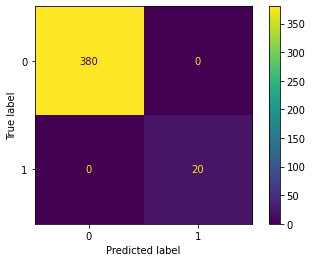

In [18]:
# Evaluate the composit model
y_pred = (y_pred_composit/len(classifiers)).round(decimals=0)

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(ground_truth, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(ground_truth, y_pred)
Precision = metrics.precision_score(ground_truth, y_pred)
Sensitivity_recall = metrics.recall_score(ground_truth, y_pred)
Specificity = metrics.recall_score(ground_truth, y_pred, pos_label=0)

In [19]:
print('Accuracy:    ', round(Accuracy, 3),           ' (True Po + True Ne)/Total Predictions, How often is the model correct?')
print('Precision:   ', round(Precision, 3),          ' True Po/(True Po + False Po), Of the positives predicted, what percentage is truly positive?')
print('Sensitivity: ', round(Sensitivity_recall, 3), ' True Po/(True Po + False Ne), Of all the positive cases, what percentage are predicted positive?')
print('Specificity: ', round(Specificity, 3),        ' True Ne/(True Ne + False Po), How well the model is at prediciting negative results?')

Accuracy:     1.0  (True Po + True Ne)/Total Predictions, How often is the model correct?
Precision:    1.0  True Po/(True Po + False Po), Of the positives predicted, what percentage is truly positive?
Sensitivity:  1.0  True Po/(True Po + False Ne), Of all the positive cases, what percentage are predicted positive?
Specificity:  1.0  True Ne/(True Ne + False Po), How well the model is at prediciting negative results?


## Feature Importance Using IsolationForest
Isolation Forest model (<code>IForest</code>) is the only one that produces feature importance. It is included in the <code>classifiers</code> in the above cell.

In [20]:
feature_importance = []
for model in selected_models:
    if model[0]=='Isolation Forest':
        for i in range(n_features):
            feature_importance = feature_importance + [[i, model[1].feature_importances_[i]]]

feature_importance.sort(key=lambda x:x[1], reverse=True)

# Print sorted feature_importance
feature_importance

[[16, 0.06309844018172761],
 [6, 0.0607022930516456],
 [2, 0.057976172866949054],
 [15, 0.056614579304662634],
 [17, 0.05595954020454081],
 [12, 0.05451027590586362],
 [10, 0.053064951523266346],
 [9, 0.05094680540851547],
 [14, 0.049978732536675965],
 [11, 0.0491472835470366],
 [0, 0.04843643992464049],
 [8, 0.048413868661470176],
 [3, 0.04629944502260561],
 [4, 0.045858518181612754],
 [18, 0.04566086323272499],
 [19, 0.04461255689833935],
 [13, 0.044339503759205735],
 [1, 0.04264053583266287],
 [5, 0.04263945032686939],
 [7, 0.039099743628985065]]

# Training, Test Split
In case you want to do a more thorough job, split the data into training &test. <br>
Fit the models with __X_train__ & hyperparameter tuning with __y_train__. <br>
Predict with __X_test__ & compare it to __y_test__.

In [21]:
print( len(X), len(ground_truth) )

400 400


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, ground_truth, test_size=0.25, random_state=42)

In [23]:
sum(y_train)

11